In [62]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull
import geojson
import numpy as np

In [64]:
LISTINGS = 'listings.csv'
NUMBERS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [65]:
listings = pd.read_csv(LISTINGS)

In [66]:
listings['bathrooms'] = listings['bathrooms_text'].apply(lambda x: x.split(" ")[0] if type(x) == str else 0)
listings['bathrooms'] = listings['bathrooms'].apply(lambda x: float(x) if str(x)[0] in NUMBERS else np.nan)
listings['bathrooms'] = listings['bathrooms'].dropna()

In [67]:
fig = px.scatter(listings, x='bathrooms', y='review_scores_value')
fig.show()

In [68]:
fig = px.histogram(listings, color='bathrooms', x='review_scores_value', barmode='group', histnorm="percent")
fig.show()

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



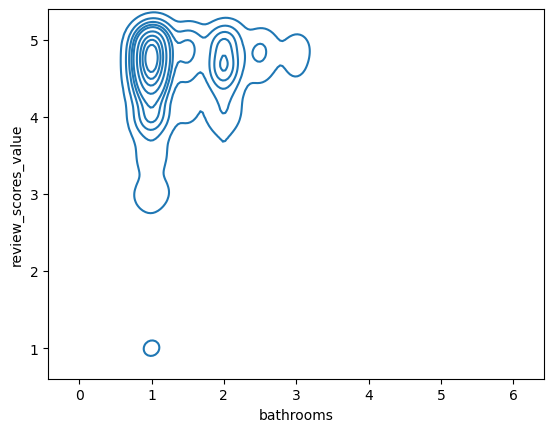

In [69]:
sns.kdeplot(listings, x='bathrooms', y='review_scores_value')
plt.show()

In [70]:
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color="neighbourhood_cleansed", zoom=9)
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=9, mapbox_center={"lat": 42.3584, "lon": -71.05977})

fig.show()


In [122]:
# outlines were drawn using some code from chat-gpt that was altered to fit the needed criteria

grouped = listings.groupby('neighbourhood_cleansed')
boundary_points = pd.DataFrame(columns=['latitude', 'longitude', 'neighbourhood'])

features = []

for name, group in grouped:
    points = group[['latitude', 'longitude']].values
    hull = ConvexHull(points)
    boundary_indices = hull.vertices
    boundary = points[boundary_indices]
    for point in boundary:
        boundary_points = pd.concat([boundary_points,(pd.DataFrame([{'latitude': point[0], 
                                                      'longitude': point[1], 'neighbourhood': name}]))])
        
    boundary_points = pd.concat([boundary_points, pd.DataFrame([{'latitude': boundary[0][0], 
                                                          'longitude': boundary[0][1], 'neighbourhood': name}])])
    
    boundary = list(boundary)
    boundary.append(boundary[0])
    boundary = np.array(boundary)
    boundary = np.transpose(boundary)    
    
    features.append(geojson.Feature(geometry=geojson.Polygon([(lat, lon) for lat, 
                                lon in zip(boundary[0], boundary[1])]),
                                    properties={"neighbourhood_cleansed": name}))
    
    
    boundary_geo = geojson.FeatureCollection(features)
    
               
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color="neighbourhood_cleansed", zoom=9)

for name, group in boundary_points.groupby('neighbourhood'):
    fig.add_scattermapbox(lat=group['latitude'], lon=group['longitude'], mode='lines', line=dict(color='black', width=2))
    
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=9, mapbox_center={"lat": 42.3584, "lon": -71.05977})
fig.show()


C:\Users\jerem\AppData\Local\Temp\ipykernel_28068\307394083.py:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [125]:
neighbourhood_agg = listings.groupby("neighbourhood_cleansed", as_index=False)["review_scores_value"].mean()

fig = px.choropleth_mapbox(neighbourhood_agg, geojson=boundary_geo,locations='neighbourhood_cleansed',
                           color='review_scores_value',color_continuous_scale="Viridis",
                           mapbox_style="carto-positron",
                           zoom=9, center = {"lat": 42.3584, "lon": -71.05977},
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
print(fig)
fig.show()

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geojson': {'features': [{'geometry': {'coordinates': [[42.347467,
                                                                     -71.133201],
                                                                     [42.34718,
                                                                     -71.13543],
                                                                     [42.34736,
                                                                     -71.13911],
                                                                     [42.34745,
                                                                     -71.14036],
                                                                     [42.349809,
                                                                     -71.143754],
                                                                     [42.350896,
                                                             